<a href="https://colab.research.google.com/github/mofuoku417/anomaly-detection/blob/main/Detecting_Anomalies_In_Crude_Oil_Prices_Using_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
from pandas import read_csv
import math 
import numpy as np # Python's fundamental package for scientific computing
import pandas as pd # For data analysis and manipulation
from datetime import date, timedelta # Date Operations
import matplotlib.pyplot as plt # To aid in visualizing
%matplotlib inline
import seaborn as sns
import matplotlib.dates as mdates # Date formatting

#####Loading the dataset

In [36]:
#Load dataset
path = 'https://raw.githubusercontent.com/mofuoku417/anomaly-detection/main/Data/crude_oil.csv'
df = read_csv(path, parse_dates=True,)

####Inspecting the downloaded data:

In [37]:
print(f"Downloaded {len(df)} rows of data.")
df

Downloaded 23024 rows of data.


,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,1/4/00,23.9000,24.7000,23.8900,24.3900,32509,USD
1,Brent Oil,1/5/00,24.2500,24.3700,23.7000,23.7300,30310,USD
2,Brent Oil,1/6/00,23.5500,24.2200,23.3500,23.6200,44662,USD
3,Brent Oil,1/7/00,23.5700,23.9800,23.0500,23.0900,34826,USD
4,Brent Oil,1/10/00,23.0400,23.7800,23.0400,23.7300,26388,USD
...,...,...,...,...,...,...,...,...
23019,Heating Oil,6/13/22,4.3612,4.3762,4.1949,4.2834,46406,USD
23020,Heating Oil,6/14/22,4.2749,4.4570,4.2488,4.3940,36652,USD
23021,Heating Oil,6/15/22,4.3816,4.6070,4.3557,4.5470,36908,USD
23022,Heating Oil,6/16/22,4.5320,4.5825,4.4124,4.5713,28269,USD


In [38]:
#Checking the data types
df.dtypes

Symbol       object
Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Currency     object
dtype: object

In [39]:
df.head(5)

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,1/4/00,23.90,24.70,23.89,24.39,32509,USD
1,Brent Oil,1/5/00,24.25,24.37,23.70,23.73,30310,USD
2,Brent Oil,1/6/00,23.55,24.22,23.35,23.62,44662,USD
3,Brent Oil,1/7/00,23.57,23.98,23.05,23.09,34826,USD
4,Brent Oil,1/10/00,23.04,23.78,23.04,23.73,26388,USD


In [40]:
df.tail(5)

,Symbol,Date,Open,High,Low,Close,Volume,Currency
23019,Heating Oil,6/13/22,4.3612,4.3762,4.1949,4.2834,46406,USD
23020,Heating Oil,6/14/22,4.2749,4.4570,4.2488,4.3940,36652,USD
23021,Heating Oil,6/15/22,4.3816,4.6070,4.3557,4.5470,36908,USD
23022,Heating Oil,6/16/22,4.5320,4.5825,4.4124,4.5713,28269,USD
23023,Heating Oil,6/17/22,4.5719,4.6444,4.2936,4.3398,0,USD


####Selecting columns of interest

In [44]:
df1 = df[['Date', 'Symbol', 'Close']]
df1.head(5)

,Date,Symbol,Close
0,1/4/00,Brent Oil,24.39
1,1/5/00,Brent Oil,23.73
2,1/6/00,Brent Oil,23.62
3,1/7/00,Brent Oil,23.09
4,1/10/00,Brent Oil,23.73


####Visualizing the adjusted close price data

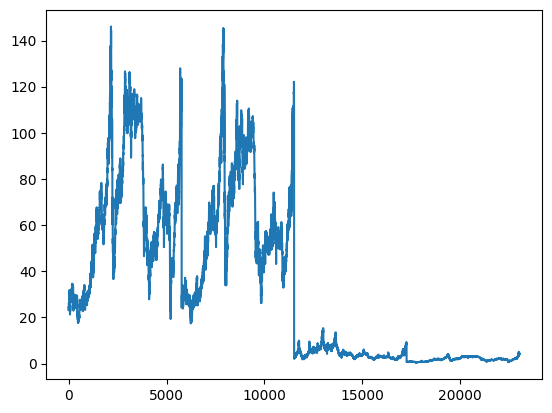

In [45]:
# Ploting adjusted close price data
df['Close'].plot()
plt.show()

####Improving the legibility of the plot by scaling it, labeling it appropriately, and adding grid lines.

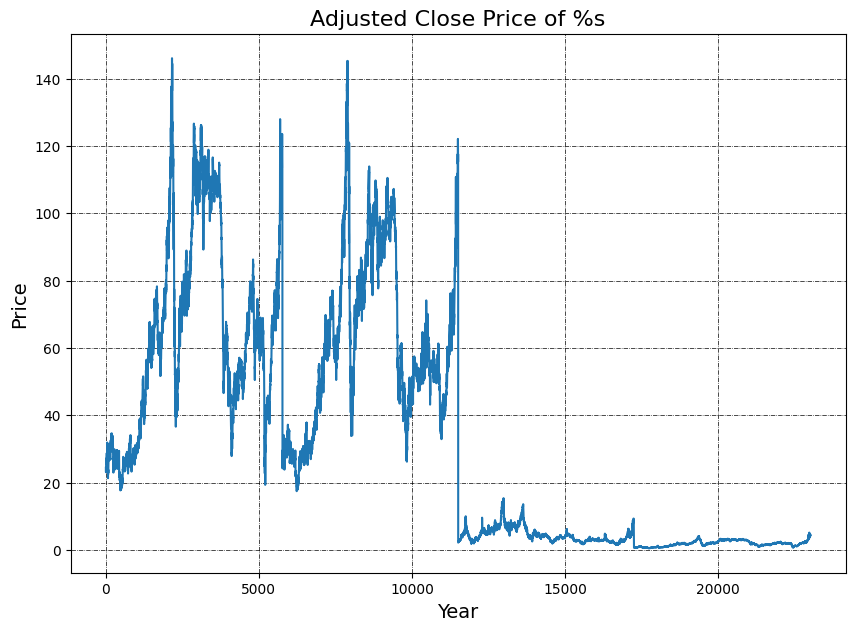

In [46]:
# Plot the adjusted close price
df['Close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

In [47]:
df.dtypes

Symbol       object
Date         object
Open        float64
High        float64
Low         float64
Close       float64
Volume        int64
Currency     object
dtype: object